# zomato-bangalore-restaurant



#**Contents**
- Importing libraries
- Data Exploration
    1. Importing Data
    2. Data Insights
- Data Cleaning
  1. Dropping Columns which are not needed
  2. Renaming Columns
  3. Dealing with Duplicate Values
  4. Dealing with Rate Column
  5. Dealing with Null Values
  6. Cleaning Columns
- Data Visualization

#### Importing libraries

In [2]:
pip install opendatasets --upgrade --quiet

In [3]:
import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: maheshkumar0018
Your Kaggle Key: ··········


100%|██████████| 89.0M/89.0M [00:00<00:00, 121MB/s]


In [4]:
file_path = './zomato-bangalore-restaurants/zomato.csv'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
zomato_df = pd.read_csv(file_path)
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
zomato_df.shape

(51717, 17)

In [8]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
zomato_df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [10]:
zomato_df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

### **Data Cleaning**

#### 1. Dropping Columns which are not needed

In [11]:
zomato_df = zomato_df.drop(['url', 'address', 'phone', 'menu_item', 'dish_liked', 'reviews_list'], axis = 1)
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


#### 2. Renaming Columns

In [12]:
zomato_df.rename(columns = {'approx_cost(for two people)':'cost_for_two', 'listed_in(type)':'Type'}, inplace = True)
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


#### 3. Dealing with Duplicate Values

In [13]:
zomato_df.drop_duplicates(inplace = True)
zomato_df.shape

(51609, 11)

#### 4. Dealing with Rate Column
  - Yes, there are Null values in rate feature
  - and is in object data type

In [14]:
zomato_df['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 51609, dtype: object

In [15]:
zomato_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Removing 'NEW', '-' and '/5' from Rate Column

In [16]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
zomato_df['rate'] = zomato_df['rate'].apply(handlerate)
zomato_df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [17]:
zomato_df['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

#### 5. Dealing with Null Values

#### Filling NaN rate values with mean of Rate column

In [18]:
zomato_df['rate'].fillna(zomato_df['rate'].mean(), inplace = True)
zomato_df['rate'].isnull().sum()

0

In [19]:
zomato_df['rate'].isnull().sum()

0

In [20]:
zomato_df.isnull().sum()

name                 0
online_order         0
book_table           0
rate                 0
votes                0
location            21
rest_type          227
cuisines            45
cost_for_two       344
Type                 0
listed_in(city)      0
dtype: int64

In [21]:
## calculating percentages of null values
zomato_df.isnull().sum()/len(zomato_df) *100

name               0.000000
online_order       0.000000
book_table         0.000000
rate               0.000000
votes              0.000000
location           0.040691
rest_type          0.439846
cuisines           0.087194
cost_for_two       0.666550
Type               0.000000
listed_in(city)    0.000000
dtype: float64

In [22]:
# Droping the null vales
zomato_df.dropna(inplace=True)
zomato_df.isnull().sum()

name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
cuisines           0
cost_for_two       0
Type               0
listed_in(city)    0
dtype: int64

In [23]:
zomato_df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,"1,500",Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,Bar,Finger Food,600,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars,Whitefield


In [26]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',', '')
        return float(value)
    else:
       return float(value)
    
zomato_df['cost_for_two'] = zomato_df['cost_for_two'].apply(handlecomma)
zomato_df['cost_for_two'].unique()  

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

#### rest_type

In [31]:
zomato_df['rest_type']

0              Casual Dining
1              Casual Dining
2        Cafe, Casual Dining
3                Quick Bites
4              Casual Dining
                ...         
51712                    Bar
51713                    Bar
51714                    Bar
51715                    Bar
51716     Bar, Casual Dining
Name: rest_type, Length: 51042, dtype: object

In [27]:

rest_types = zomato_df['rest_type'].value_counts(ascending  = False)
rest_types

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [28]:
zomato_df['cuisines']

0                North Indian, Mughlai, Chinese
1                   Chinese, North Indian, Thai
2                        Cafe, Mexican, Italian
3                    South Indian, North Indian
4                      North Indian, Rajasthani
                          ...                  
51712                               Continental
51713                               Finger Food
51714                               Finger Food
51715                               Finger Food
51716    Finger Food, North Indian, Continental
Name: cuisines, Length: 51042, dtype: object

Generalizing restaurant cusine-type with less than 1000 Restaurant into Others Category

In [32]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

In [33]:
def handle_rest_type(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
        
zomato_df['rest_type'] = zomato_df['rest_type'].apply(handle_rest_type)
zomato_df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

#### location

In [35]:
location = zomato_df['location'].value_counts(ascending  = False)
location

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

Generalizing location with less than 300 Restaurant into Others Category

In [36]:
location_lessthan300 = location[location<300]
location_lessthan300

Koramangala 8th Block            294
Vasanth Nagar                    293
Jeevan Bhima Nagar               268
Wilson Garden                    246
Bommanahalli                     236
Koramangala 3rd Block            215
Thippasandra                     191
Kumaraswamy Layout               191
Nagawara                         187
Basaveshwara Nagar               187
Seshadripuram                    165
Hennur                           159
Majestic                         155
HBR Layout                       153
Infantry Road                    150
Race Course Road                 139
City Market                      122
Yeshwantpur                      119
ITPL Main Road, Whitefield       113
Varthur Main Road, Whitefield    109
South Bangalore                  107
Koramangala 2nd Block            102
Kaggadasapura                    101
Hosur Road                        98
CV Raman Nagar                    89
Vijay Nagar                       78
RT Nagar                          78
S

In [38]:
def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
        
zomato_df['location'] = zomato_df['location'].apply(handle_location)
zomato_df['location'].value_counts()

BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

#### cuisines

In [42]:
cuisines = zomato_df['cuisines'].value_counts()
cuisines

North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: cuisines, Length: 2704, dtype: int64

Generalizing cusines with less than 100 Restaurant into Others Category

In [43]:
cuisines_lessthan100 = cuisines[cuisines<100]
cuisines_lessthan100

North Indian, Continental, Chinese          97
Juices                                      94
Fast Food, North Indian                     93
Bengali, North Indian                       93
Beverages, Juices                           90
                                            ..
North Indian, Chinese, Oriya, Mithai         1
Beverages, Burger                            1
North Indian, Mughlai, Lucknowi              1
Continental, Thai, North Indian, Chinese     1
North Indian, Chinese, Arabian, Momos        1
Name: cuisines, Length: 2635, dtype: int64

In [44]:
def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
zomato_df['cuisines'] = zomato_df['cuisines'].apply(handle_cuisines)
zomato_df['cuisines'].value_counts()

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [45]:
zomato_df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet,Banashankari


## Data Visualization

Now that the data is cleaned. We can visualize the data. The problems we will try to answer are :

- Restaurants with Online Order Option.
- Restaurants with Table Booking Option.
- Top 10 Restaurants in Bangalore
- Top 10 Cuisines in Bangalore
- Top 10 Restaurants Types in Bangalore
- Top 10 Location with Most Restaurant Numbers in Bangalore
- Restaurants Rating Distribution
- Cost for 2 People Distribution
- Restaurants Rating VS Cost for 2 People
- All The South Indian Restaurants
- All the North Indian Restaurants


Restaurants with Online Order Option.

In [52]:
restaurants_online_order_option_yes = zomato_df[zomato_df['online_order']=='Yes']['online_order']
len(restaurants_online_order_option_yes)

30228

In [53]:
restaurants_online_order_option_no = zomato_df[zomato_df['online_order']=='No']['online_order']
len(restaurants_online_order_option_no)

20814

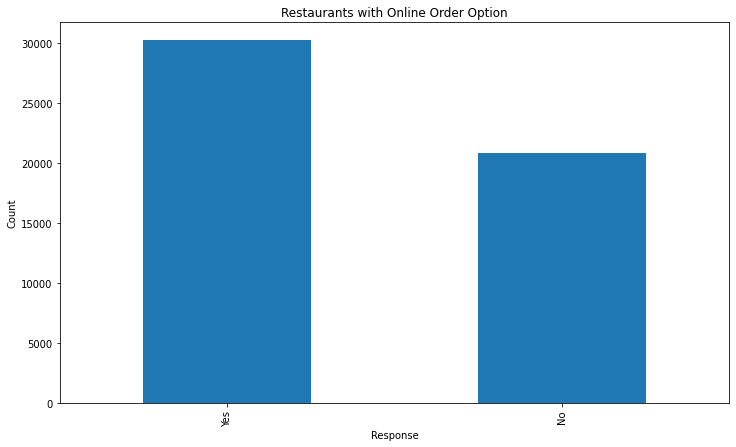

In [70]:
values = zomato_df['online_order'].value_counts()
plt.figure(figsize=(12,7))
values.plot(kind='bar')
plt.title('Restaurants with Online Order Option')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

#### Restaurants with Table Booking Option.

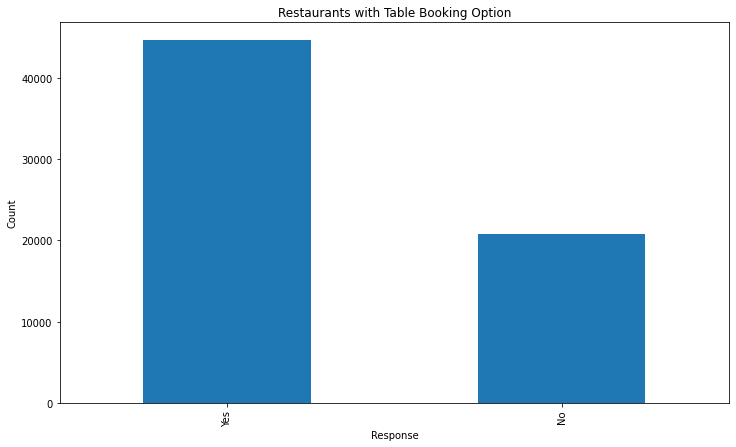

In [71]:
count = zomato_df['book_table'].value_counts()
plt.figure(figsize=(12,7))
count.plot(kind='bar')
values.plot(kind='bar')
plt.title('Restaurants with Table Booking Option')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()


#### Top 10 Restaurants in Bangalore

In [94]:
Top_10_Restaurants = zomato_df.groupby('name').count().sort_values(by='rest_type',ascending=False)['rest_type'][:10]
Top_10_Restaurants

name
Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Pizza Hut            62
Name: rest_type, dtype: int64

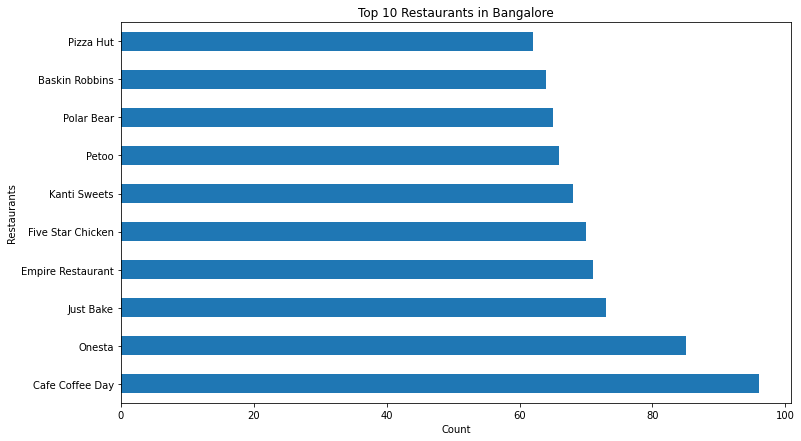

In [96]:
plt.figure(figsize=(12,7))
Top_10_Restaurants.plot(kind='barh')
plt.title("Top 10 Restaurants in Bangalore")
plt.xlabel("Count")
plt.ylabel("Restaurants")
plt.show()


#### Top 10 Cuisines in Bangalore

Text(0.5, 1.0, 'Most popular cuisines of Bangalore')

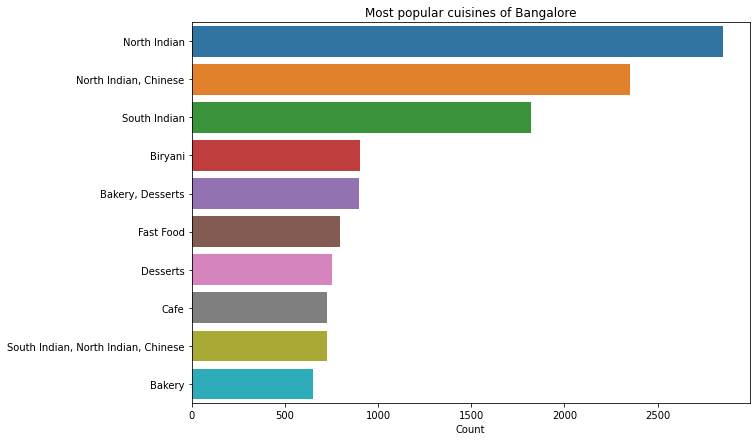

In [111]:
plt.figure(figsize=(10,7))
cuisines=zomato_df['cuisines'].value_counts()[1:11]
sns.barplot(x=cuisines,y=cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines of Bangalore")

#### Top 10 Restaurants Types in Bangalore

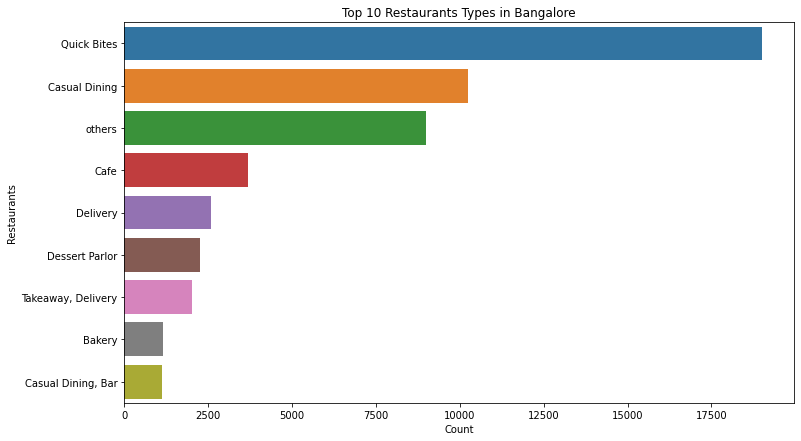

In [115]:
restaurants = zomato_df['rest_type'].value_counts()
plt.figure(figsize=(12,7))
sns.barplot(x=restaurants,y=restaurants.index)
plt.title('Top 10 Restaurants Types in Bangalore')
plt.xlabel('Count')
plt.ylabel('Restaurants')
plt.show()

#### Top 10 Location with Most Restaurant Numbers in Bangalore

In [119]:
locations = zomato_df['location'].value_counts()[:10]
locations

BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Name: location, dtype: int64

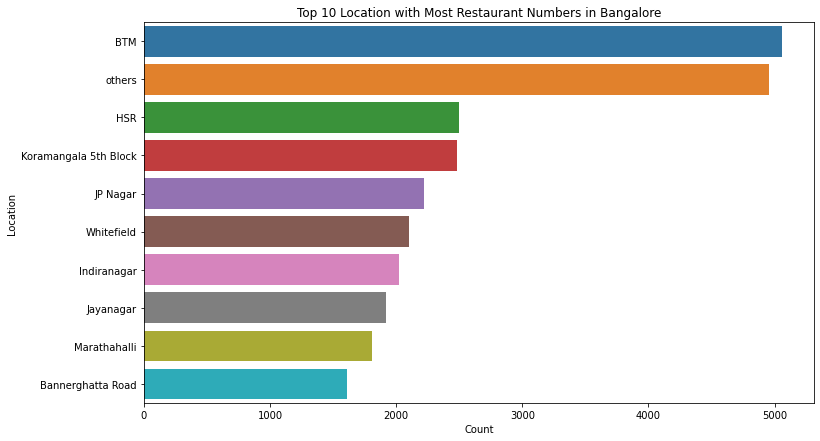

In [121]:
plt.figure(figsize=(12,7))
sns.barplot(x=locations,y=locations.index)
plt.title('Top 10 Location with Most Restaurant Numbers in Bangalore')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

In [116]:
zomato_df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,others,others,800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,others,600.0,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,others,Continental,1500.0,Pubs and bars,Whitefield
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,others,Finger Food,600.0,Pubs and bars,Whitefield
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,others,Finger Food,2000.0,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,others,others,Finger Food,2500.0,Pubs and bars,Whitefield


#### Restaurants Rating Distribution

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


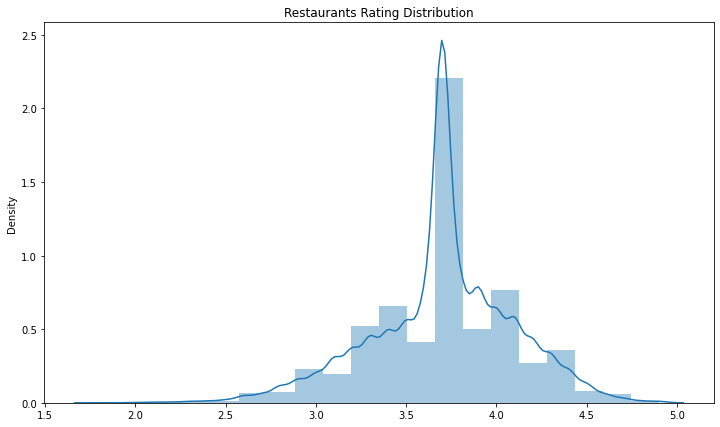

In [122]:
plt.figure(figsize=(12,7))
sns.distplot(x=zomato_df['rate'],bins=20)
plt.title('Restaurants Rating Distribution')
plt.show()

####  Cost for 2 People Distribution

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


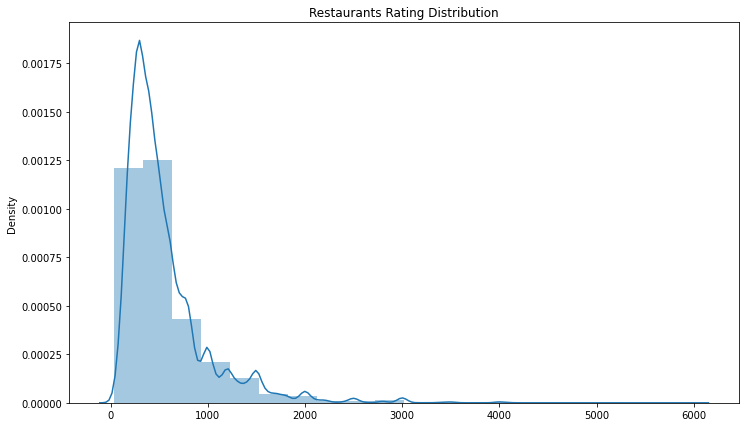

In [130]:
plt.figure(figsize=(12,7))
sns.distplot(x=zomato_df['cost_for_two'],bins=20)
plt.title('Restaurants Rating Distribution')
plt.show()

#### Restaurant Rating VS Cost for 2 People

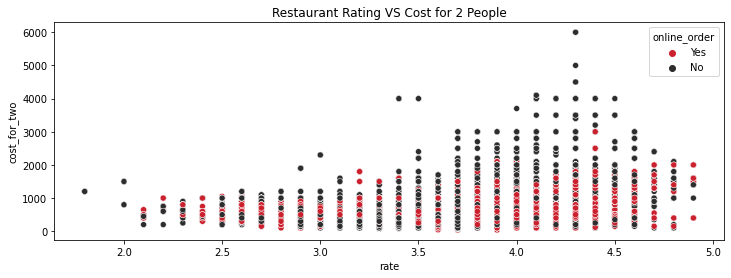

In [132]:
cost_dist = zomato_df[['rate','cost_for_two','online_order']]
plt.figure(figsize=(12,4))
plt.title('Restaurant Rating VS Cost for 2 People')
sns.scatterplot(x="rate",y='cost_for_two',hue='online_order',data=cost_dist, palette=sns.color_palette(['#cb202d','#2d2d2d']))
plt.show()

####  All The South Indian Restaurant

In [138]:
SouthIndianFoodRestaurants = zomato_df[zomato_df['cuisines'].str.contains('South Indian', case=False, regex=True,na=False)]
SouthIndianFoodRestaurants.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,Type,listed_in(city)
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
39,Maruthi Davangere Benne Dosa,Yes,No,4.0,17,Banashankari,Quick Bites,South Indian,150.0,Delivery,Banashankari
41,Havyaka Mess,No,No,3.9,28,Banashankari,others,South Indian,300.0,Delivery,Banashankari
66,Namma Brahmin's Idli,Yes,No,3.6,34,Jayanagar,Quick Bites,South Indian,100.0,Delivery,Banashankari
76,Sri Guru Kottureshwara Davangere Benne Dosa,Yes,No,4.1,558,Basavanagudi,Quick Bites,South Indian,150.0,Delivery,Banashankari


#### All the North Indian Restaurants

In [139]:
NorthIndianFoodRestaurants = zomato_df[zomato_df['cuisines'].str.contains('North Indian', case=False, regex=True,na=False)]
NorthIndianFoodRestaurants.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,North Indian,600.0,Buffet,Banashankari
36,Fast And Fresh,Yes,No,2.8,91,Banashankari,Quick Bites,"North Indian, Chinese, Fast Food",400.0,Delivery,Banashankari
46,Kitchen Garden,Yes,No,3.6,244,others,Quick Bites,"North Indian, Chinese",300.0,Delivery,Banashankari
